<a href="https://colab.research.google.com/github/NAVEED261/MY-AI-ASSISTANT/blob/main/filter_and_remove_messages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph langchain_google_genai

In [ ]:
from google.colab import userdata
import os
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
from google.colab import userdata
langchainY = userdata.get('Langchain_api_key')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Langchain_api_key"

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    google_api_key=GOOGLE_API_KEY # Changed to use the variable instead of the string.
)

In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
msg= [AIMessage("Hi how r u?.", name="Bot", id="1")]
msg.append(HumanMessage("im fine thank u and u .", name="Lance", id="2"))
msg.append(AIMessage("do u know about karachi?", name="Bot", id="3"))
msg.append(HumanMessage("Yes, I know about karachi, ", name="Lance", id="4"))
for m in msg:
  m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi how r u?.
================================ Human Message =================================
Name: Lance

im fine thank u and u .
================================== Ai Message ==================================
Name: Bot

do u know about karachi?
================================ Human Message =================================
Name: Lance

Yes, I know about karachi, 


In [ ]:
llm.invoke(msg)

AIMessage(content="Great! What specifically about Karachi interests you?  I'd love to hear your thoughts or any questions you have about it.\n", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-4f224f9e-092d-4b4c-8576-0e106f513351-0', usage_metadata={'input_tokens': 32, 'output_tokens': 27, 'total_tokens': 59, 'input_token_details': {'cache_read': 0}})

In [ ]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph
from langchain_core.messages import RemoveMessage ,SystemMessage



In [ ]:
def filter_messages(state: MessagesState) -> MessagesState:
    # Delete all but the 2 most recent messages
    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState) -> MessagesState:
    return {"messages": [llm.invoke(state["messages"])]}

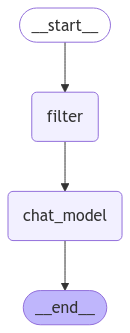

In [ ]:
builder: StateGraph = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
output = graph.invoke({'messages': msg})
for m in output['messages']:
    m.pretty_print()


================================== Ai Message ==================================
Name: Bot

do u know about karachi?
================================ Human Message =================================
Name: Lance

Yes, I know about karachi, 
================================== Ai Message ==================================

Great!  To help me understand what you'd like to discuss about Karachi, could you tell me what specifically interests you about it?  For example, are you interested in its:

* **History?** (e.g., its founding, its role in the partition of India)
* **Culture?** (e.g., its diverse ethnicities, its food scene, its music)
* **Economy?** (e.g., its port, its industries)
* **Geography?** (e.g., its coastline, its climate)
* **Current events?** (e.g., political climate, social issues)
* **Specific neighborhoods or landmarks?** (e.g., Clifton, Frere Hall, Empress Market)


Let me know what you'd like to talk about!


In [ ]:
output = graph.invoke({'messages': [HumanMessage(content="hi i m hafiz naveed uddin")]})
for m in output['messages']:
    m.pretty_print()


================================ Human Message =================================

hi i m hafiz naveed uddin
================================== Ai Message ==================================

Assalamu Alaikum Hafiz Naveed Uddin.  How can I help you today?
